In [ ]:
import os
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import numpy as np

AUDIO ANALYSIS

First exploration of audio files performed by imotions

In [2]:

folder = '/Users/laura/Documents/RICHEMONT/New data/Audio Analysis/Sensor Data/'

files = [f for f in os.listdir(folder) if f.endswith('.csv')]


for i, file in enumerate(files):
    print(f"{i + 1}. {file}")




1. 009_20250320102209.csv
2. 003_20250319111137.csv
3. 010_20250320102703.csv
4. 007_20250319175930.csv
5. 013_20250320161803.csv
6. 002_20250319110316.csv
7. 011_20250320102819.csv
8. 004_20250319114114.csv
9. 008_20250320101302.csv
10. 013_20250320161803- expanded .csv
11. 012_20250320130748.csv
12. 001_20250319100559.csv
13. 006_20250319161509.csv
14. 005_20250319141434.csv


In [3]:
selector = widgets.Dropdown(
    options=files,
    description='File:',
    layout=widgets.Layout(width='50%')
)

load_button = widgets.Button(description="Load File", button_style='success')

output = widgets.Output()

def load_file(b):
    global df
    selected_file = selector.value
    path_user = os.path.join(folder, selected_file)
    df = pd.read_csv(path_user)
    
    with output:
        output.clear_output()
        print(f"Loaded file: {selected_file}")
        display(df.head())

display(widgets.VBox([selector, load_button, output]))
load_button.on_click(load_file)

In [4]:
# Cleaning the metadata
data = df[df.iloc[:, 0] == '#DATA'].index[0]
df_clean = df.iloc[data + 1:].copy()
df_clean.columns = df_clean.iloc[0]
df_clean = df_clean.iloc[1:]

df_clean = df_clean.reset_index(drop=True)
df_clean['Timestamp'] = pd.to_numeric(df_clean['Timestamp'], errors='coerce')

In [5]:
#Segmenting shops

from datetime import datetime, timedelta

start_recording =datetime.strptime("10:05", "%H:%M")

shops = {
    "Boutique1": ("11:29", "12:03"),
    "Boutique2": ("12:03", "12:45"),
    "Boutique3": ("12:45", "13:14")
}

range_shops = {}
for name, (ini_str, fin_str) in shops.items():
    start = datetime.strptime(ini_str, "%H:%M") - start_recording
    end = datetime.strptime(fin_str, "%H:%M") - start_recording
    range_shops[name] = (start.total_seconds() * 1000, end.total_seconds() * 1000)

segments = {}
for shop, (start_ms, end_ms) in range_shops.items():
    segments[shop] = df_clean[
        (df_clean['Timestamp'] >= start_ms) & (df_clean['Timestamp'] < end_ms)
    ]
for shop, df_shop in segments.items():


    start_ms = df_shop['Timestamp'].min()
    end_ms = df_shop['Timestamp'].max()
    duration_min = (end_ms - start_ms) / 60000  
    print(f"{shop}: {duration_min:.2f} mins")



Boutique1: 34.00 mins
Boutique2: 42.00 mins
Boutique3: 29.00 mins


Explanation IMOTIONS

			Metric	Expected Range	What it Represents
Voice_Anger	0 – 1	How angry the speaker sounds. 0 = not angry, 1 = very angry.
Voice_Happiness	0 – 1	How happy the speaker sounds.
Voice_Neutrality	0 – 1	How neutral the speaker sounds.
Voice_Sadness	0 – 1	How sad the speaker sounds.
Voice_Activation	-1 – 1	Emotional energy level. Negative = more calm, positive = more intense.
Voice_Dominance	-1 – 1	How controlling or dominant the voice sounds.
Voice_Valence	-1 – 1	Overall emotional positivity. Negative = negative emotion, positive = positive.
Voice_F0_minimum	Hz (e.g., 60–1000)	Minimum fundamental frequency detected. Depends on the speaker.
Voice_F0_maximum	Hz	Maximum pitch value detected.
Voice_F0_average	Hz	Average pitch. Typical male ~120 Hz, female ~200 Hz.
Voice_F0_variation	Hz	Pitch variability (prosody). Higher = more expressive.
Voice_Loudness_minimum	Unitless	Minimum loudness detected (relative).
Voice_Loudness_maximum	Unitless	Maximum loudness detected (relative).
Voice_Loudness_average	Unitless	Average loudness.
Voice_Loudness_variation	Unitless	Variation in loudness.
Voice_Speaking_Rate	~2 – 6	Syllables per second. Conversational average ~4–5.
Voice_Speaking_Rate_Variation	seconds (var)	Variability between syllables. Lower = more consistent rhythm.
Voice_Intonation	0 – ∞	Monotony vs expressiveness (pitch variation). Higher = more lively.
Voice_Gender_Male_confidence	0 – 1	Confidence that the voice is male.
Voice_Gender_Female_confidence	0 – 1	Confidence that the voice is female.
Voice_Gender_Child_confidence	0 – 1	Confidence that the voice is a child.
Voice_Age	Years	Estimated speaker age. May fluctuate slightly across frames.				

In [7]:
df_1=segments['Boutique1']
df_2=segments['Boutique2']
df_3=segments['Boutique3']

In [ ]:
df=df_3 # change for every daatset

#VOICE DURING AUDIO

df_voice = df[(df['Voice_Active'] == 1)].copy()




/var/folders/1m/2gsg5r5x3_xb8rgnzdgz8_t00000gn/T/ipykernel_91326/752872844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time_min'] = (df['Timestamp'] - df['Timestamp'].min()) / (1000 * 60)
/var/folders/1m/2gsg5r5x3_xb8rgnzdgz8_t00000gn/T/ipykernel_91326/752872844.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Activity_Label'] = df['Voice_Activation'].apply(lambda x: 'Silence' if pd.isna(x) else 'Speaking')
/var/folders/1m/2gsg5r5x3_xb8rgnzdgz8_t00000gn/T/ipykernel_91326/752872844.py:8: S

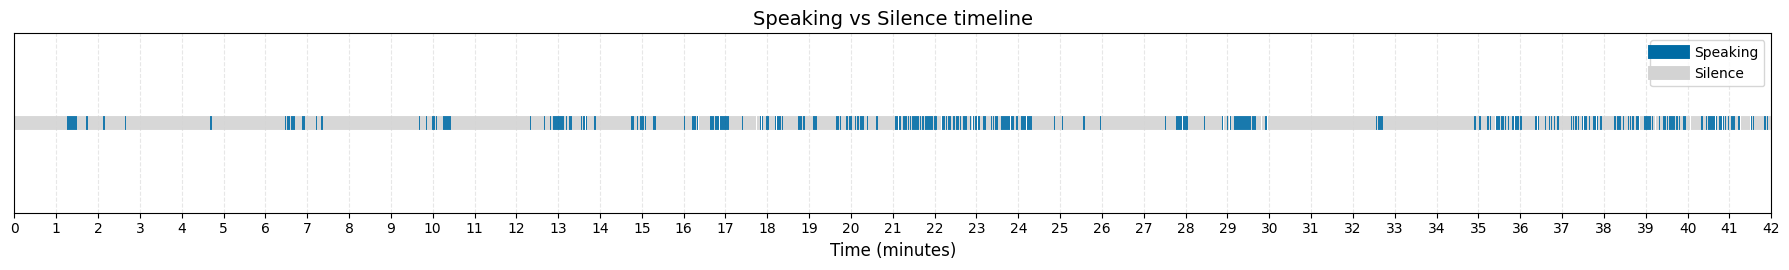

Activity_Label
Silence     76.194202
Speaking    23.805798
Name: proportion, dtype: float64


In [9]:

if 'Time_min' not in df.columns:
    df['Time_min'] = (df['Timestamp'] - df['Timestamp'].min()) / (1000 * 60)


df['Activity_Label'] = df['Voice_Activation'].apply(lambda x: 'Silence' if pd.isna(x) else 'Speaking')


df['Activity_Change'] = (df['Activity_Label'] != df['Activity_Label'].shift()).cumsum()


segments = df.groupby('Activity_Change').agg({
    'Time_min': ['first', 'last'],
    'Activity_Label': 'first'
}).reset_index()

segments.columns = ['Segment', 'Start', 'End', 'Activity_Label']
segments['Duration'] = segments['End'] - segments['Start']


segments = segments[~((segments['Activity_Label'] == 'Silence') & (segments['Duration'] < 0.008))]


colors = {
    'Speaking': '#006BA4',
    'Silence': 'lightgray'
}

# Plot
fig, ax = plt.subplots(figsize=(18, 2.8))
for _, row in segments.iterrows():
    ax.hlines(
        y=1,
        xmin=row['Start'],
        xmax=row['End'],
        color=colors.get(row['Activity_Label'], 'black'),
        linewidth=10,
        alpha=0.9
    )

ax.set_title("Speaking vs Silence timeline", fontsize=14)
ax.set_xlabel("Time (minutes)", fontsize=12)
ax.set_yticks([])

start_min = int(df['Time_min'].min())
end_min = int(np.ceil(df['Time_min'].max()))
ax.set_xticks(np.arange(start_min, end_min + 1, 1))
ax.set_xlim(start_min, end_min)
ax.grid(axis='x', linestyle='--', alpha=0.3)

# Leyenda
legend_handles = [
    Line2D([0], [0], color=color, lw=10, label=label)
    for label, color in colors.items()
]
ax.legend(handles=legend_handles, loc='upper right')

plt.tight_layout()
plt.show()
print(df['Activity_Label'].value_counts(normalize=True) * 100)


In [ ]:
# SPEAKERS
def estimate_gender(row):
    if row['Voice_Gender_Male_confidence'] > 0.7:
        return 'M'
    elif row['Voice_Gender_Female_confidence'] > 0.7:
        return 'F'
    else:
        return 'C'  
def age_label(age):
    if pd.isna(age):
        return 'NA'
    return str(int(round(age))) 

df_voice['Gender_Label'] = df_voice.apply(estimate_gender, axis=1)
df_voice['Age_Label'] = df_voice['Voice_Age'].apply(age_label)

df_voice['Speaker_Proxy'] = df_voice['Gender_Label'] + "_" + df_voice['Age_Label']
unique_speakers = df_voice['Speaker_Proxy'].unique()
print(f"\n speakers: {len(unique_speakers)}\n")

for speaker in unique_speakers:
    gender, age = speaker.split('_')
    print(f"🗣️ {speaker} → GENDER: {gender}, AGE: {age}")




 speakers: 65

🗣️ M_49 → GENDER: M, AGE: 49
🗣️ M_56 → GENDER: M, AGE: 56
🗣️ M_26 → GENDER: M, AGE: 26
🗣️ M_24 → GENDER: M, AGE: 24
🗣️ M_21 → GENDER: M, AGE: 21
🗣️ M_25 → GENDER: M, AGE: 25
🗣️ M_40 → GENDER: M, AGE: 40
🗣️ M_33 → GENDER: M, AGE: 33
🗣️ M_30 → GENDER: M, AGE: 30
🗣️ M_28 → GENDER: M, AGE: 28
🗣️ M_16 → GENDER: M, AGE: 16
🗣️ M_39 → GENDER: M, AGE: 39
🗣️ C_15 → GENDER: C, AGE: 15
🗣️ M_32 → GENDER: M, AGE: 32
🗣️ M_61 → GENDER: M, AGE: 61
🗣️ M_29 → GENDER: M, AGE: 29
🗣️ F_66 → GENDER: F, AGE: 66
🗣️ F_41 → GENDER: F, AGE: 41
🗣️ C_30 → GENDER: C, AGE: 30
🗣️ C_34 → GENDER: C, AGE: 34
🗣️ F_47 → GENDER: F, AGE: 47
🗣️ F_36 → GENDER: F, AGE: 36
🗣️ M_41 → GENDER: M, AGE: 41
🗣️ M_18 → GENDER: M, AGE: 18
🗣️ M_54 → GENDER: M, AGE: 54
🗣️ C_2 → GENDER: C, AGE: 2
🗣️ M_23 → GENDER: M, AGE: 23
🗣️ C_10 → GENDER: C, AGE: 10
🗣️ M_45 → GENDER: M, AGE: 45
🗣️ C_16 → GENDER: C, AGE: 16
🗣️ M_37 → GENDER: M, AGE: 37
🗣️ M_22 → GENDER: M, AGE: 22
🗣️ M_19 → GENDER: M, AGE: 19
🗣️ M_17 → GENDER: M, AGE: 17


In [52]:
from sklearn.cluster import KMeans
import numpy as np

# 1. average proxy age
proxy_ages = df_voice.groupby('Speaker_Proxy')['Voice_Age'].mean().dropna()
X = proxy_ages.values.reshape(-1, 1)

# 2. Clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans.fit(X)

proxy_to_real = dict(zip(proxy_ages.index, kmeans.labels_))
df_voice['Speaker_Real'] = df_voice['Speaker_Proxy'].map(proxy_to_real)

# 4. gender per speaker
speaker_summary = df_voice.groupby('Speaker_Real').agg({
    'Voice_Gender_Male_confidence': 'mean',
    'Voice_Gender_Female_confidence': 'mean',
    'Voice_Age': 'mean',
    'Speaker_Proxy': 'count'
}).rename(columns={'Speaker_Proxy': 'segments'})

def classify_gender(row):
    if row['Voice_Gender_Male_confidence'] > 0.7:
        return 'MALE'
    elif row['Voice_Gender_Female_confidence'] > 0.7:
        return 'FEMALE'
    else:
        return 'UNKNOWN'

speaker_summary['GENDER'] = speaker_summary.apply(classify_gender, axis=1)
speaker_summary['AGE'] = speaker_summary['Voice_Age'].round(1)


print("SPEAKERS CLUSTER:\n")
for idx, row in speaker_summary.iterrows():
    print(f"speaker {idx}:")
    print(f"  {row['GENDER']}")
    print(f"   {row['AGE']}")
    print(f"   {row['segments']} frames")
    print()

SPEAKERS CLUSTER:

speaker 0:
  UNKNOWN
   47.839874731523906
   1273 frames

speaker 1:
  MALE
   25.115446531351736
   3321 frames



In [53]:

df['Timestamp'] = pd.to_numeric(df['Timestamp'], errors='coerce')
df_voice['Timestamp'] = pd.to_numeric(df_voice['Timestamp'], errors='coerce')


df_voice['Speaker_Label'] = df_voice['Speaker_Real'].map(lambda x: f"Speaker {x}")


df = df.merge(
    df_voice[['Timestamp', 'Speaker_Label']],
    on='Timestamp',
    how='left'
)


df['Speaker_Label'] = df['Speaker_Label'].fillna('Silence')


/var/folders/1m/2gsg5r5x3_xb8rgnzdgz8_t00000gn/T/ipykernel_91326/1009724178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Timestamp'] = pd.to_numeric(df['Timestamp'], errors='coerce')


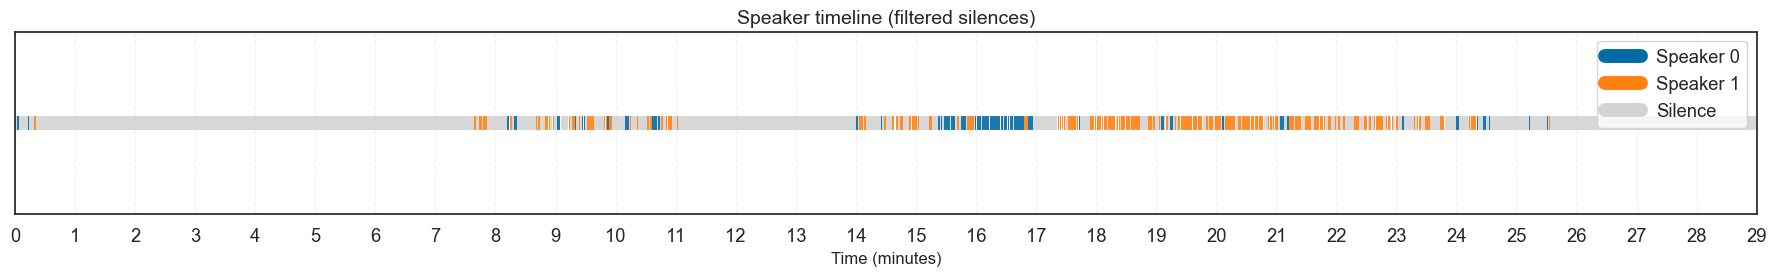

In [34]:

if 'Time_min' not in df.columns:
    df['Time_min'] = (df['Timestamp'] - df['Timestamp'].min()) / (1000 * 60)


df['Time_min_norm'] = df['Time_min'] - df['Time_min'].min()


df['Speaker_Change'] = (df['Speaker_Label'] != df['Speaker_Label'].shift()).cumsum()


segments = df.groupby('Speaker_Change').agg({
    'Time_min': ['first', 'last'],
    'Speaker_Label': 'first'
}).reset_index()

segments.columns = ['Segment', 'Start', 'End', 'Speaker_Label']
segments['Duration'] = segments['End'] - segments['Start']


segments = segments[~((segments['Speaker_Label'] == 'Silence') & (segments['Duration'] < 0.008))]


fig, ax = plt.subplots(figsize=(18, 3))

colors = {
    'Speaker 0': '#006BA4',
    'Speaker 1': '#FF800E',
    'Silence': 'lightgray'
}

for _, row in segments.iterrows():
    ax.hlines(
        y=1,
        xmin=row['Start'],
        xmax=row['End'],
        color=colors.get(row['Speaker_Label'], 'black'),
        linewidth=10,
        alpha=0.9
    )

ax.set_title("Speaker timeline (filtered silences)", fontsize=14)
ax.set_xlabel("Time (minutes)", fontsize=12)
ax.set_yticks([])


start_min = int(df['Time_min'].min())
end_min = int(np.ceil(df['Time_min'].max()))
ax.set_xticks(np.arange(start_min, end_min + 1, 1))
ax.set_xlim(start_min, end_min)
ax.grid(axis='x', linestyle='--', alpha=0.3)


legend_handles = [
    Line2D([0], [0], color=color, lw=10, label=label)
    for label, color in colors.items()
]
ax.legend(handles=legend_handles, loc='upper right')

plt.tight_layout()
plt.show()


The analysis does not seem very accurate in terms of speakers confidence (it shows many different age buckets) We perform clustering analysis.

In [54]:
metric_info = {
    'Voice_Anger': "Range: 0–1\nAnger intensity",
    'Voice_Happiness': "Range: 0–1\nHappiness level",
    'Voice_Neutrality': "Range: 0–1\nNeutral emotion",
    'Voice_Sadness': "Range: 0–1\nSadness level",
    'Voice_Activation': "Range: -1–1\nCalm ↔ Intensity",
    'Voice_Dominance': "Range: -1–1\nSubmissive ↔ Dominant",
    'Voice_Valence': "Range: -1–1\nNegative ↔ Positive emotion",
    'Voice_F0_minimum': "Hz (e.g., 60–1000)\nLowest pitch",
    'Voice_F0_maximum': "Hz\nHighest pitch",
    'Voice_F0_average': "Hz\nAverage pitch",
    'Voice_F0_variation': "Hz\nPitch variability",
    'Voice_Loudness_minimum': "Unitless\nMin loudness",
    'Voice_Loudness_maximum': "Unitless\nMax loudness",
    'Voice_Loudness_average': "Unitless\nAverage loudness",
    'Voice_Loudness_variation': "Unitless\nLoudness variation",
    'Voice_Speaking_Rate': "~2–6\nSyllables per second",
    'Voice_Speaking_Rate_Variation': "Seconds (var)\nRhythm consistency",
    'Voice_Intonation': "0 – ∞\nExpressiveness (prosody)",
    'Voice_Gender_Male_confidence': "0–1\nConfidence: male",
    'Voice_Gender_Female_confidence': "0–1\nConfidence: female",
    'Voice_Gender_Child_confidence': "0–1\nConfidence: child",
    'Voice_Age': "Years\nEstimated age"
}

voice_metrics = [col for col in df_voice.columns if col.startswith('Voice_') and col not in ['Voice_Active']]

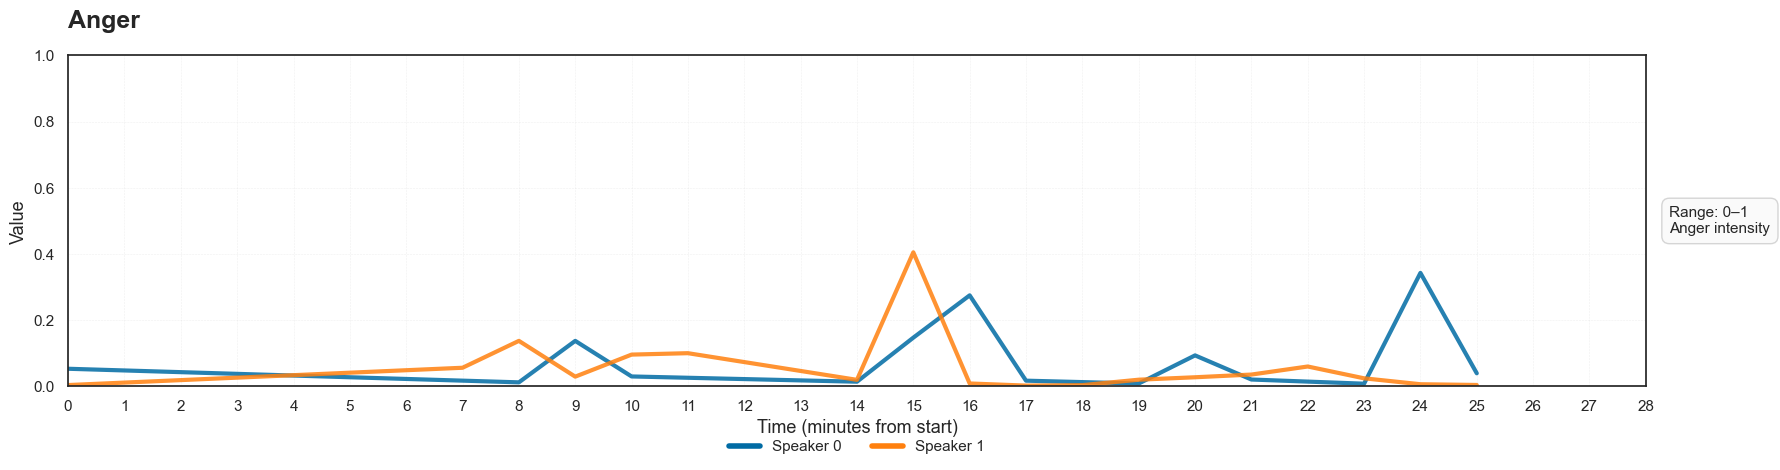

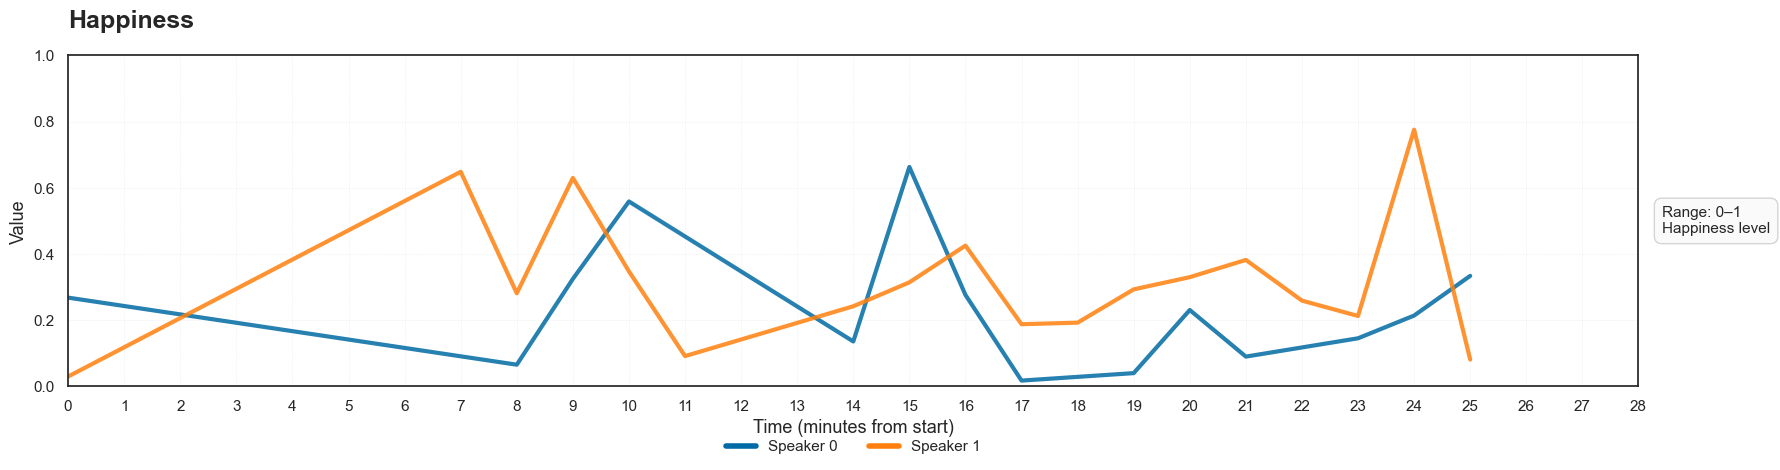

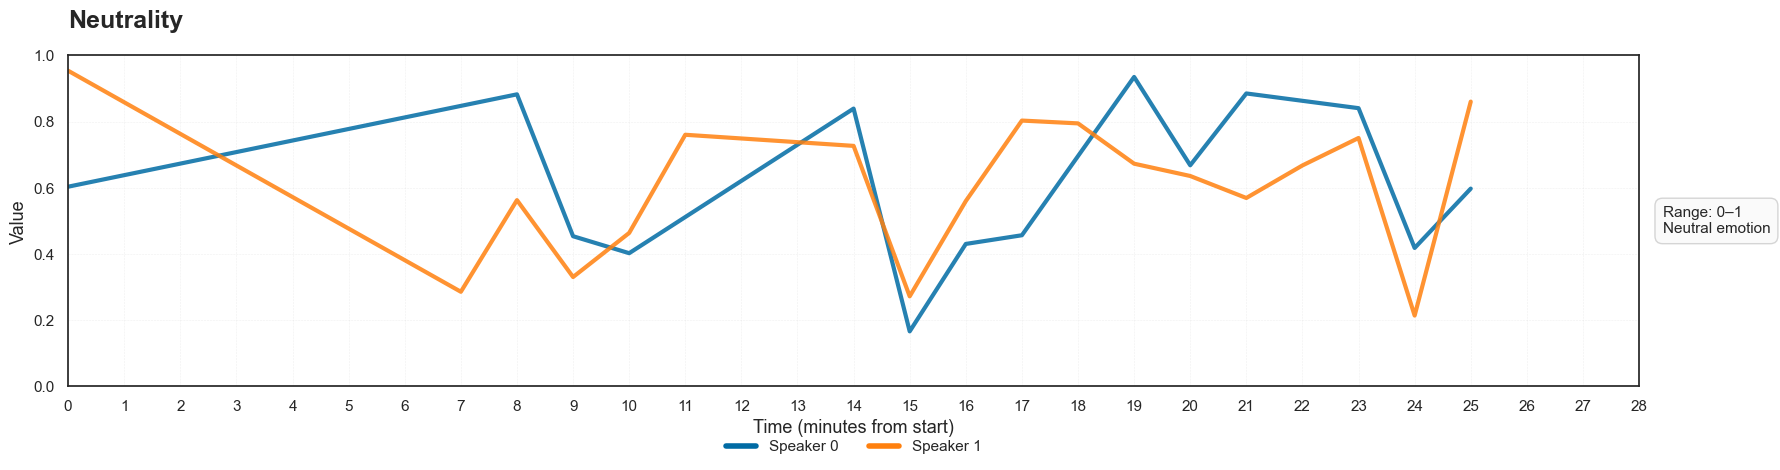

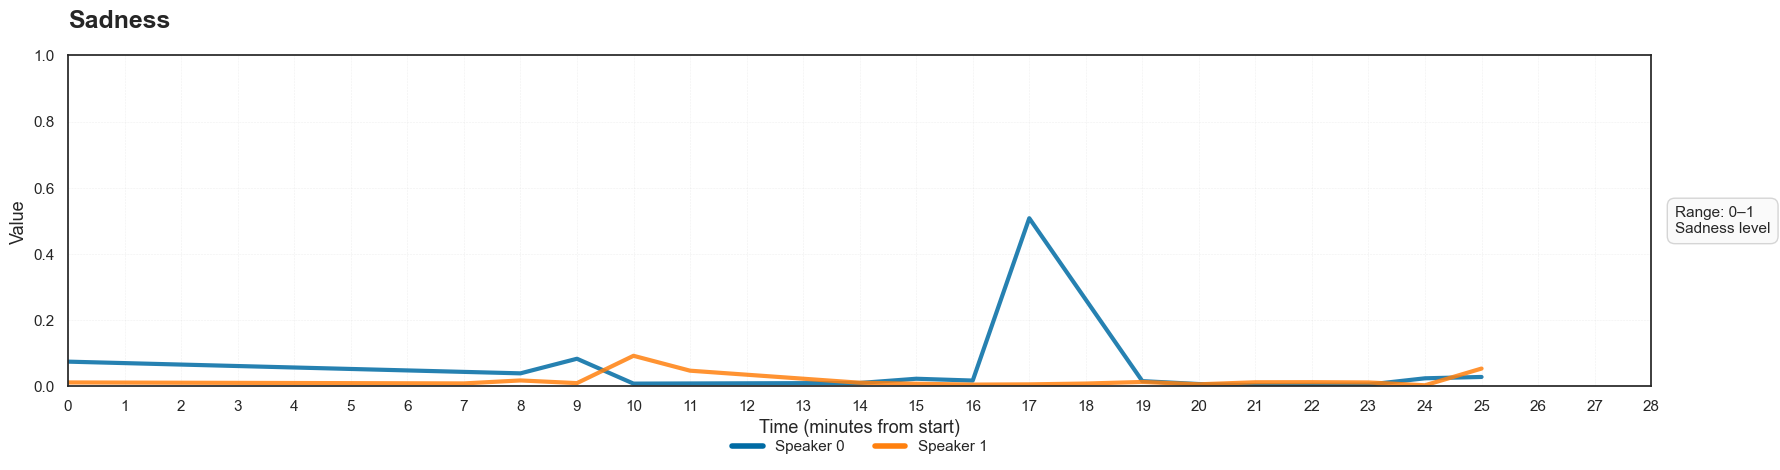

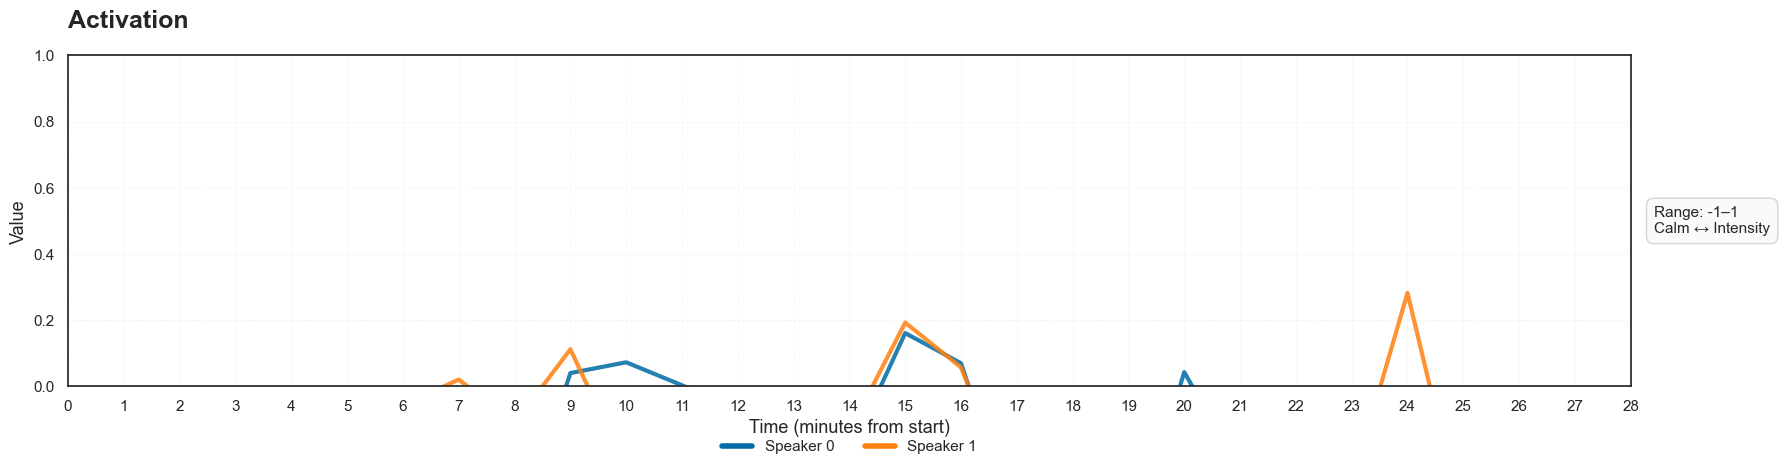

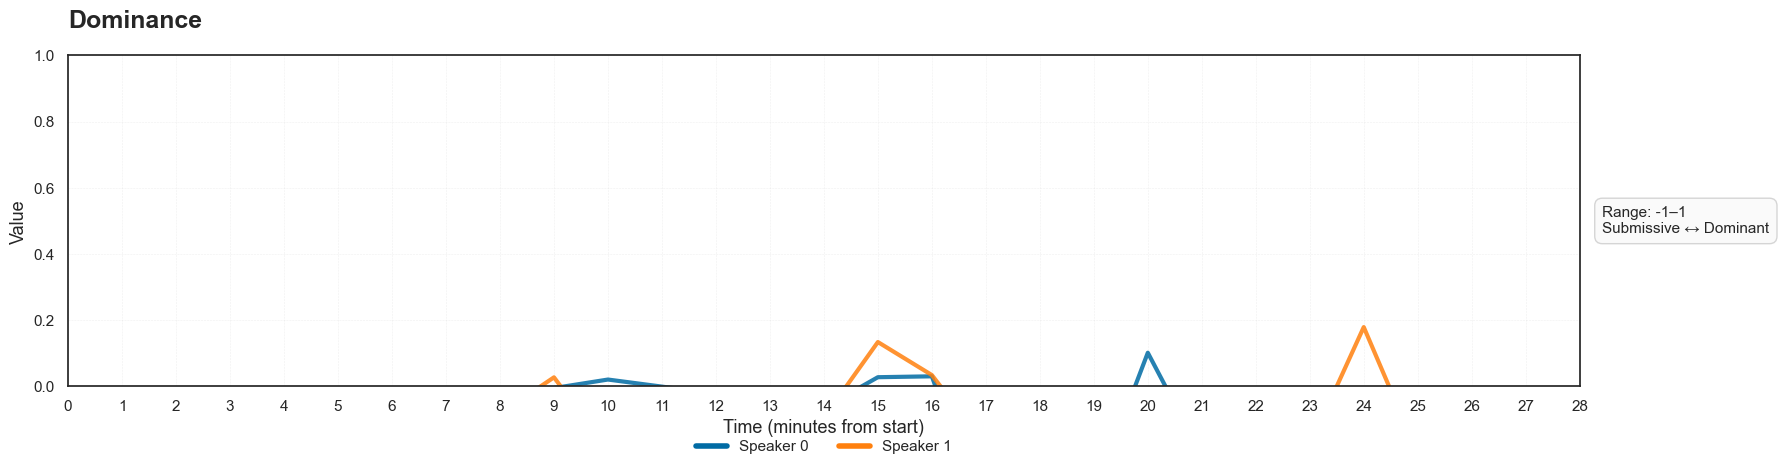

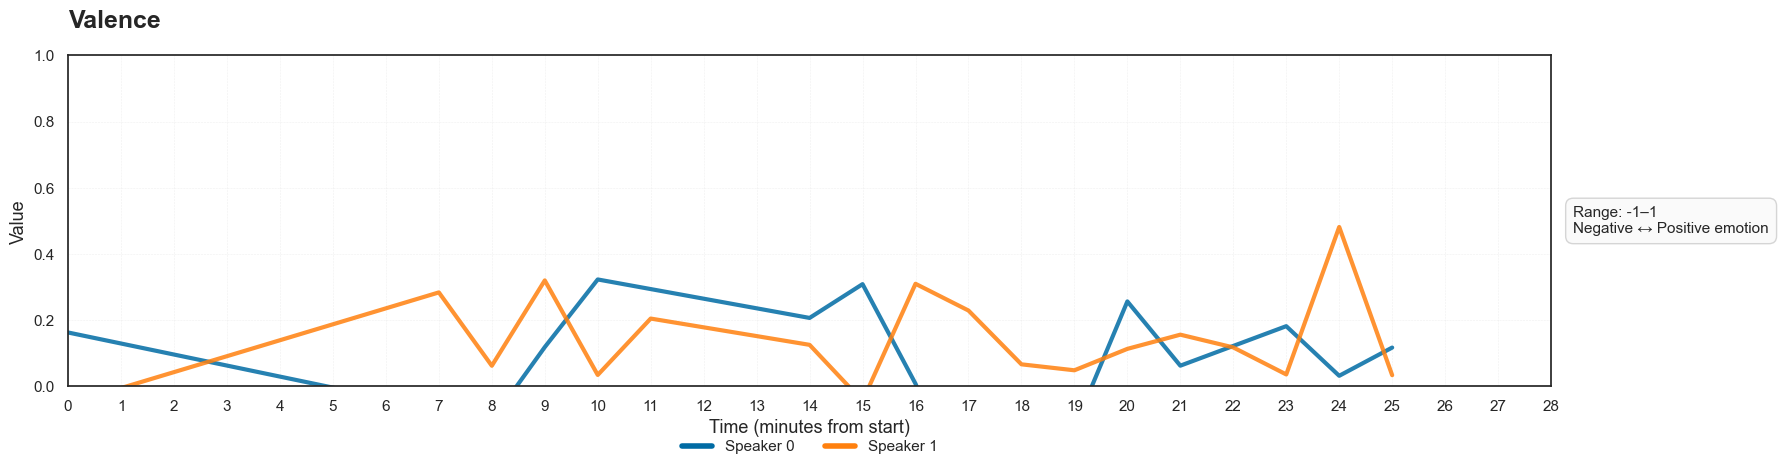

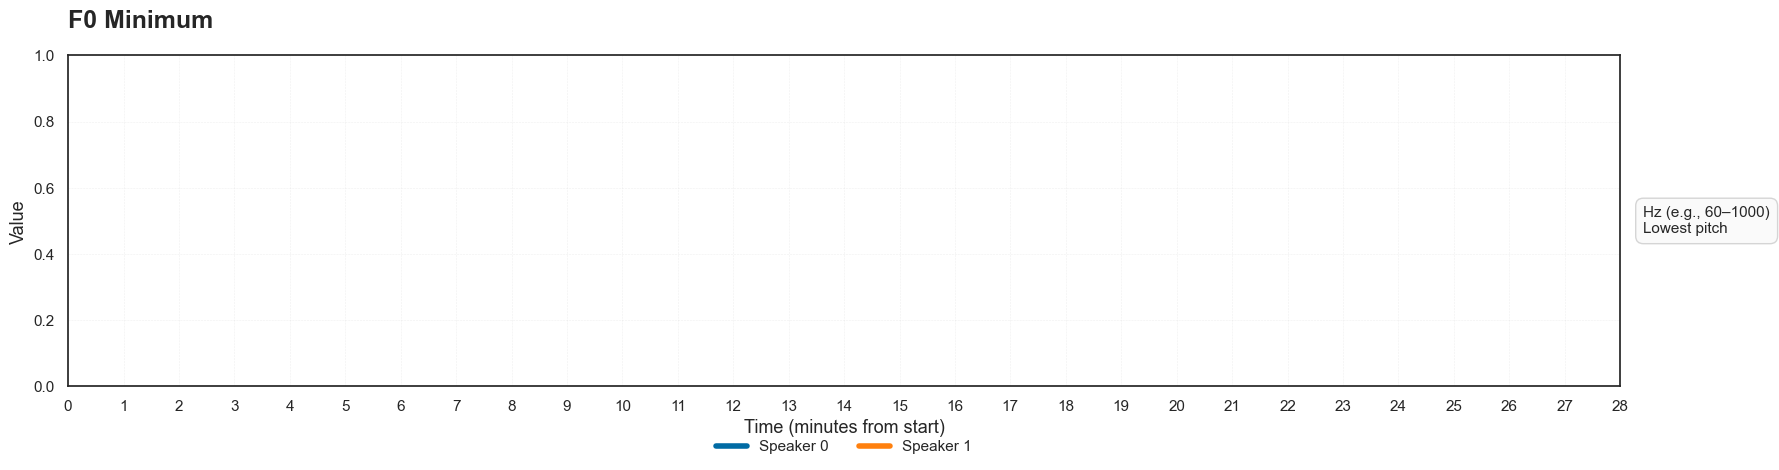

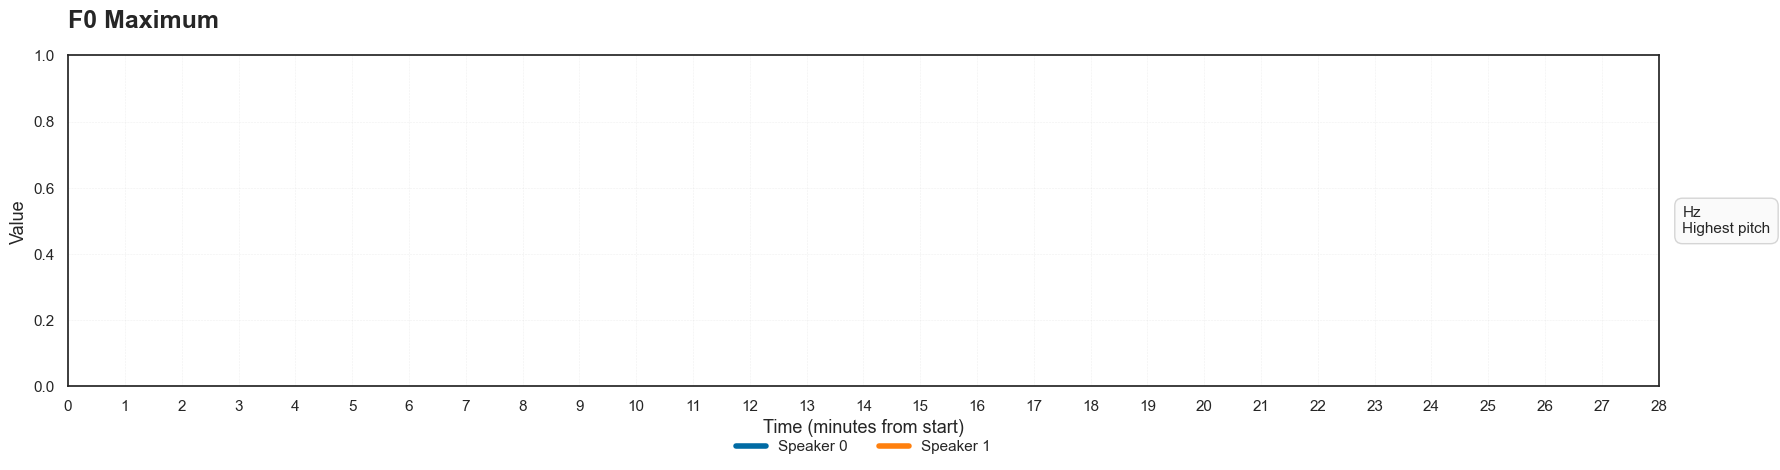

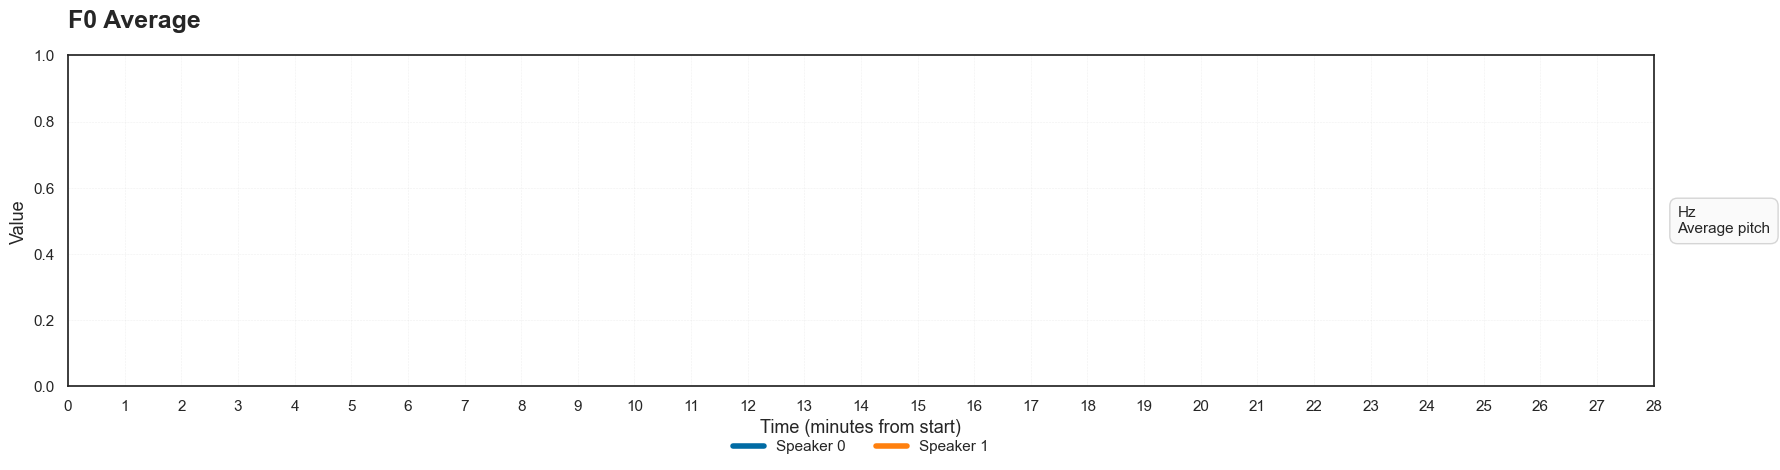

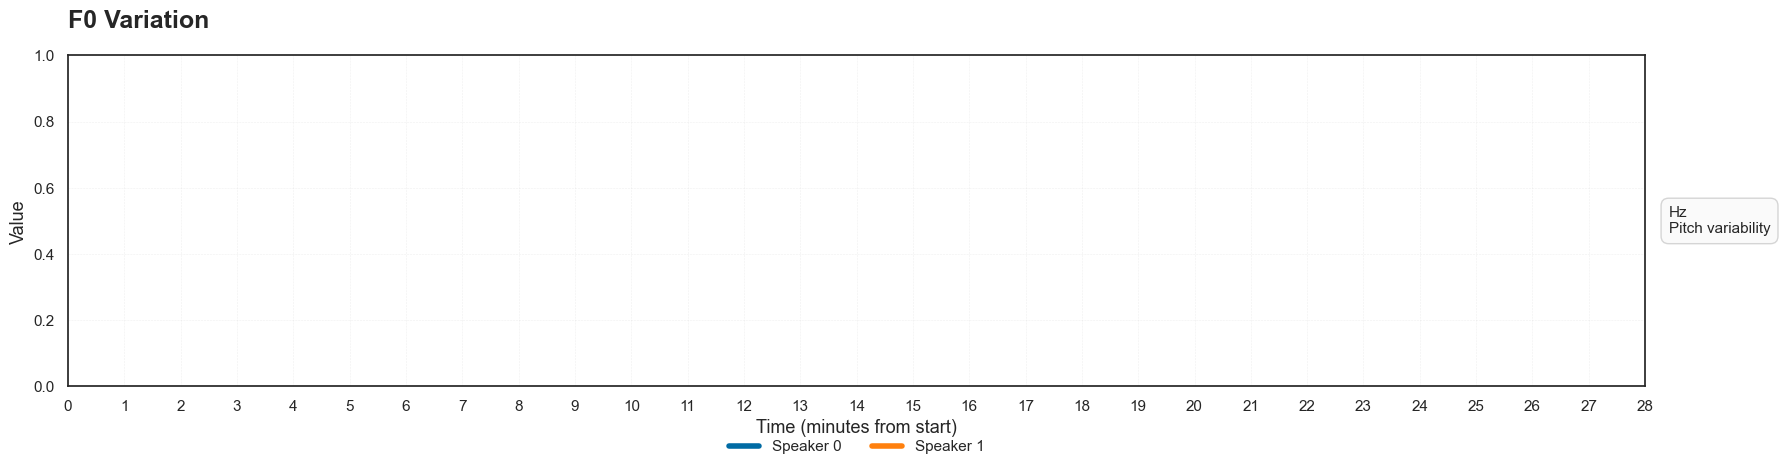

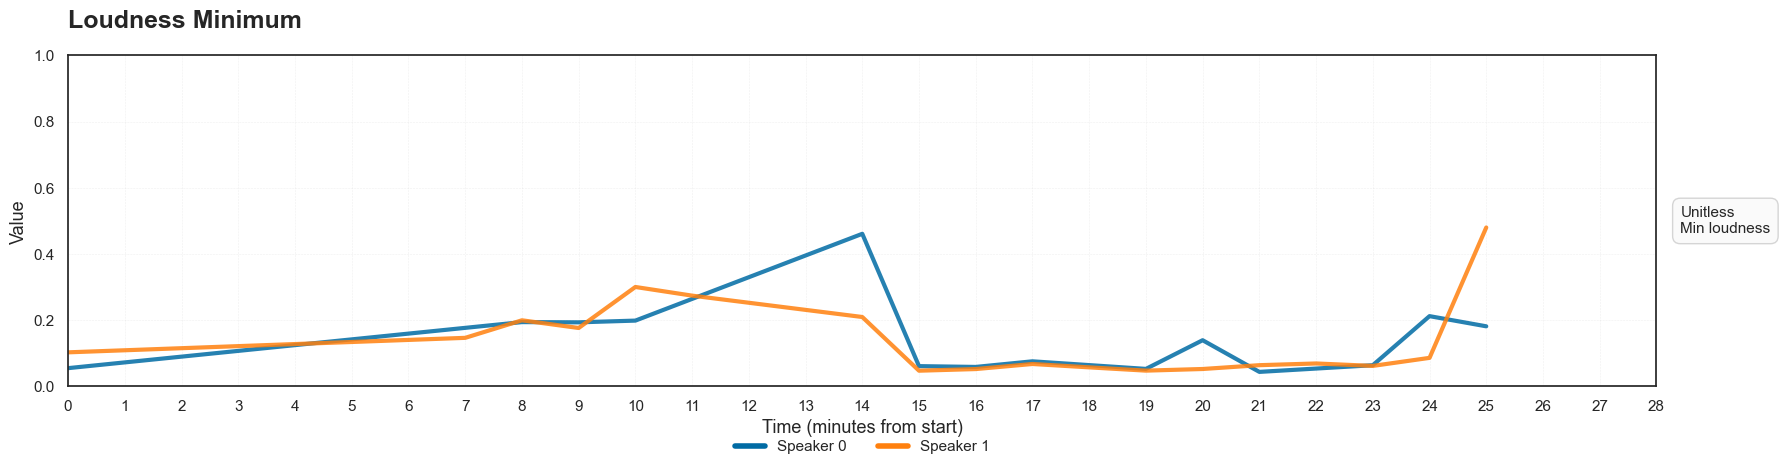

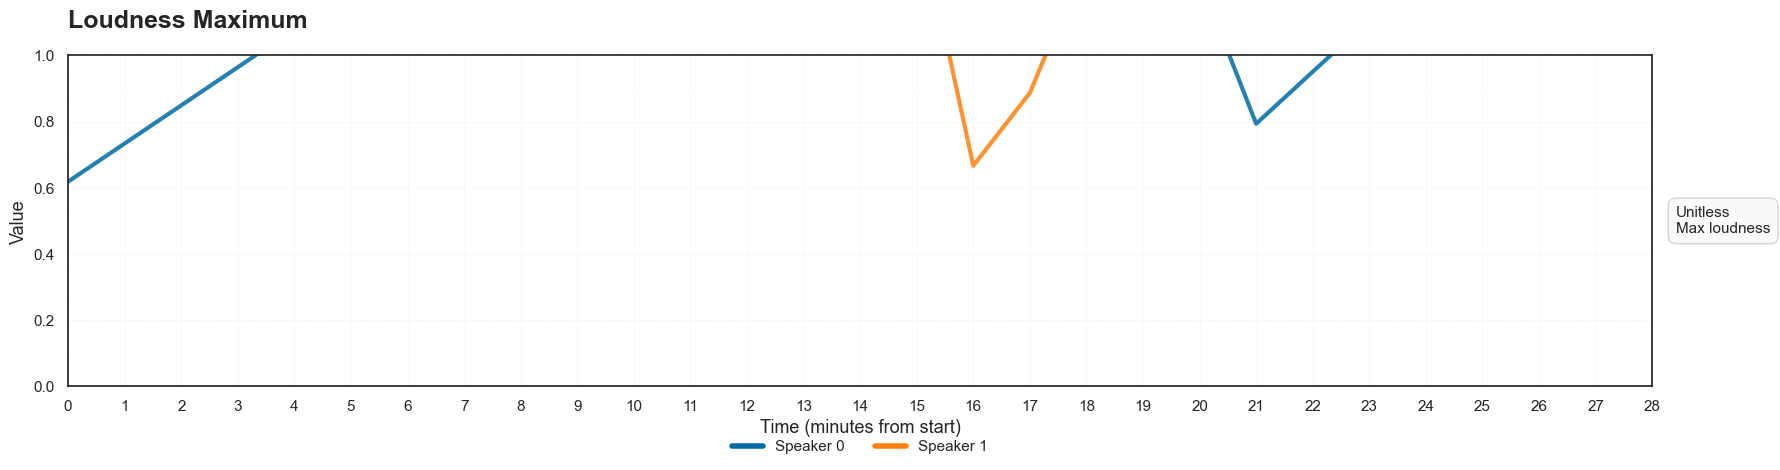

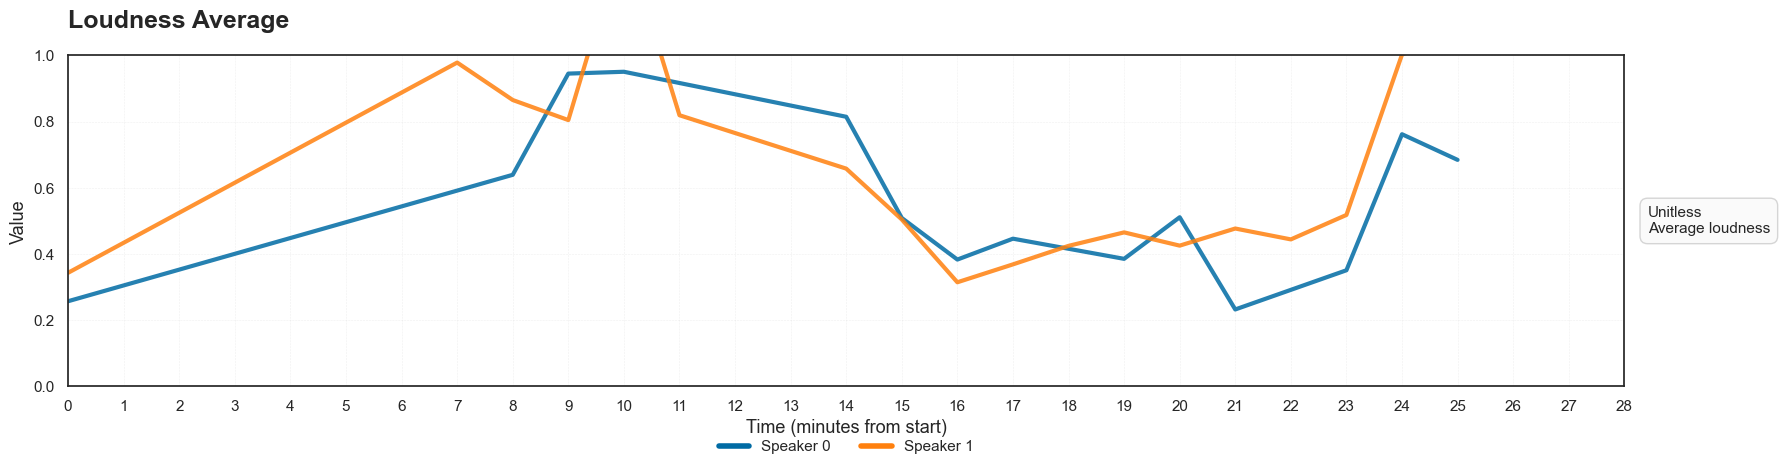

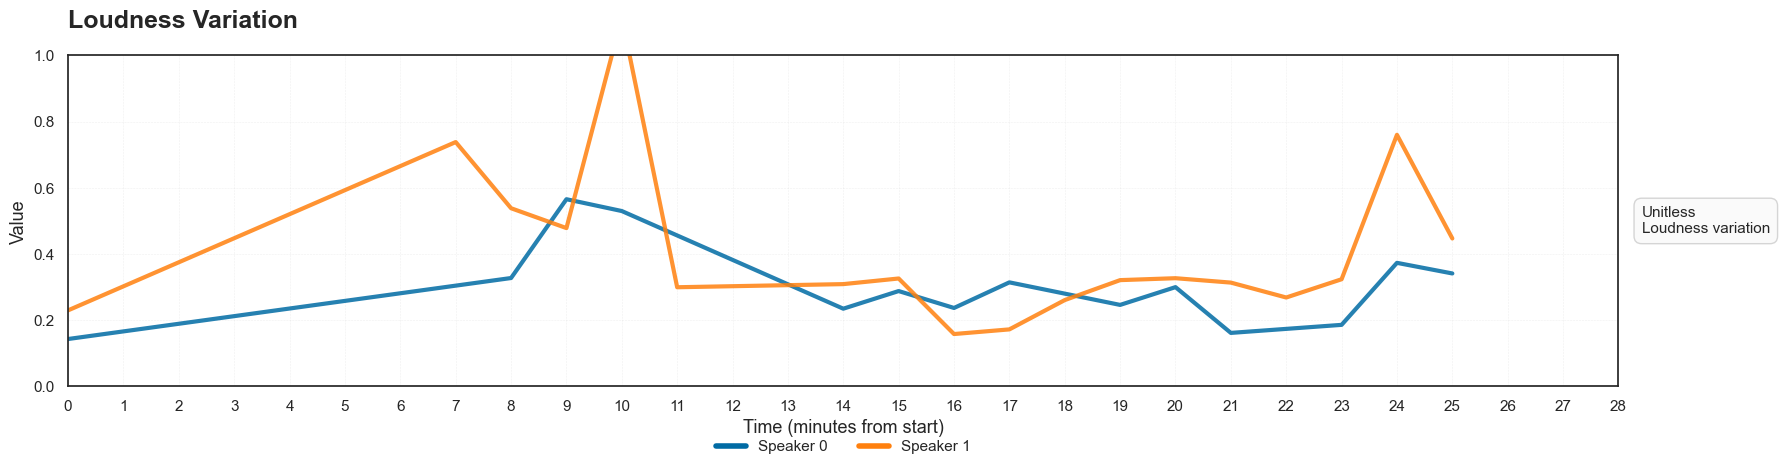

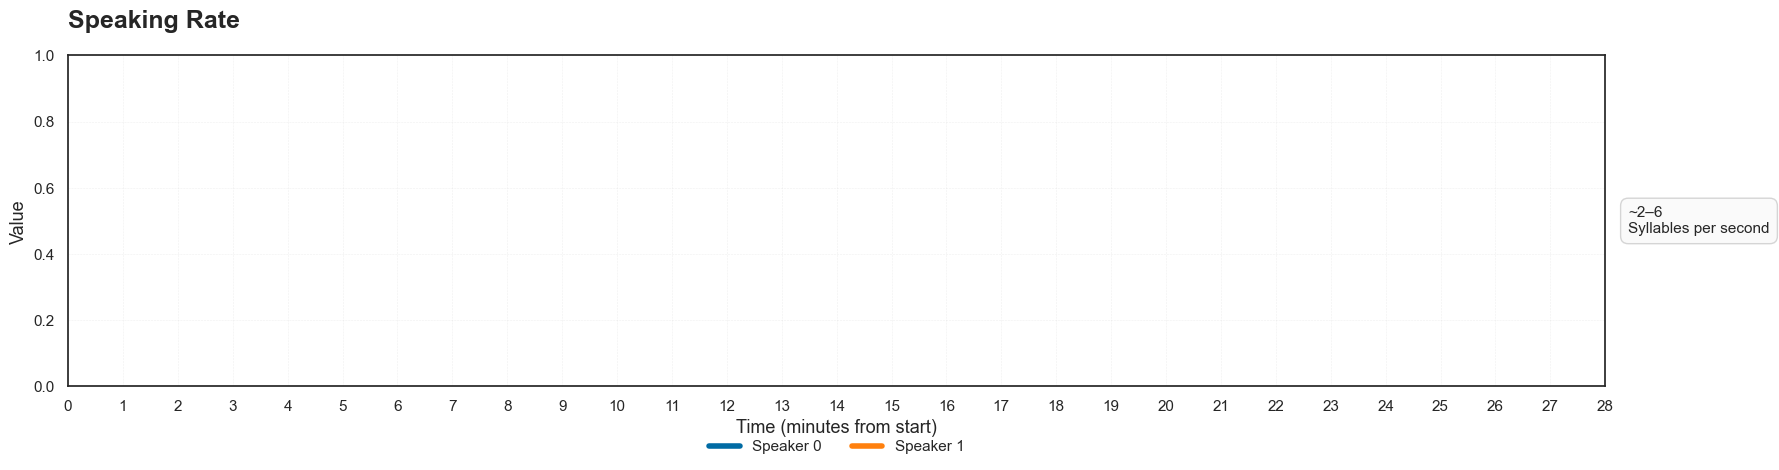

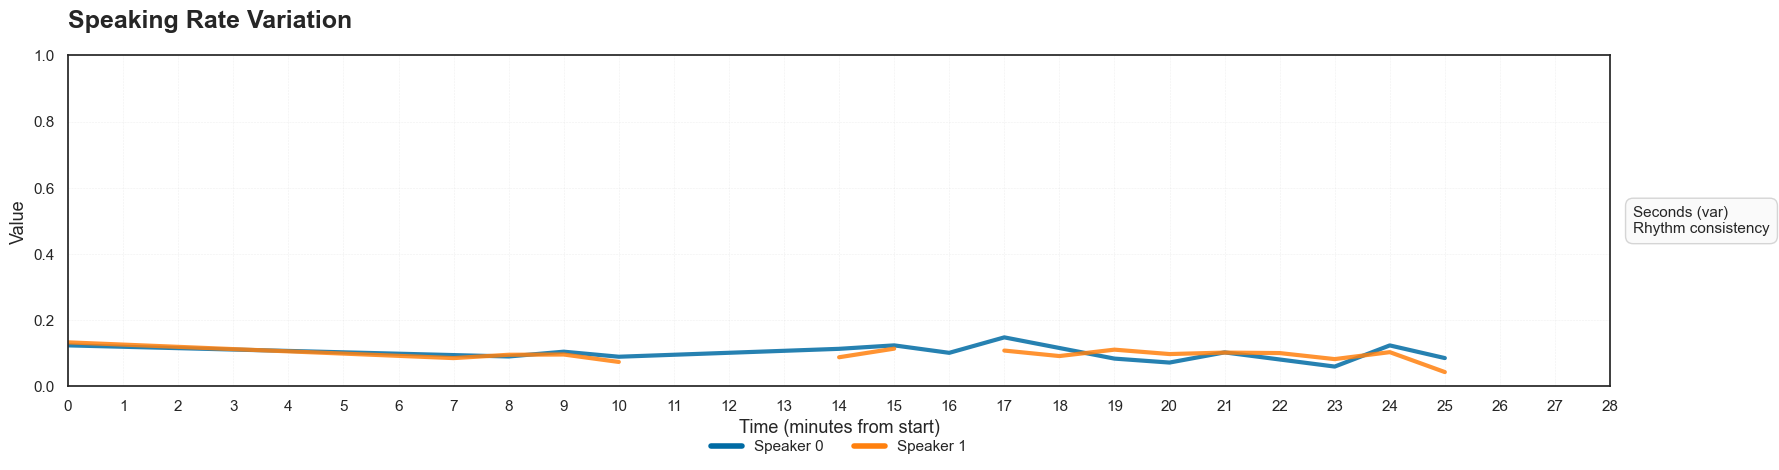

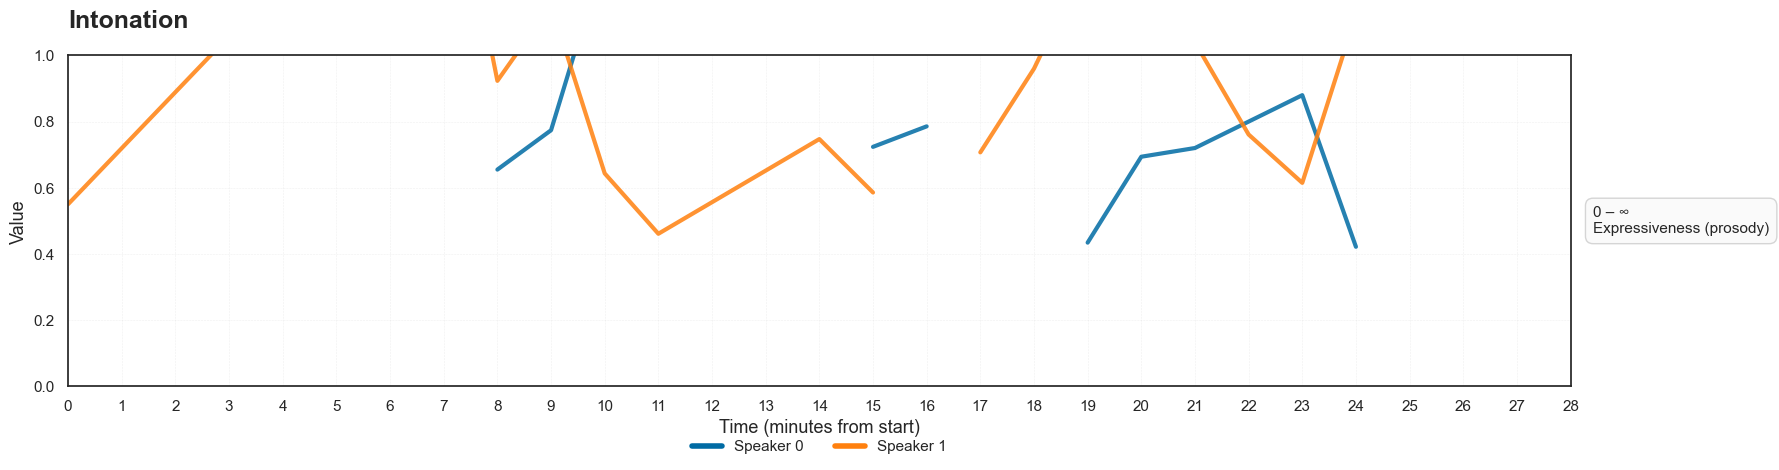

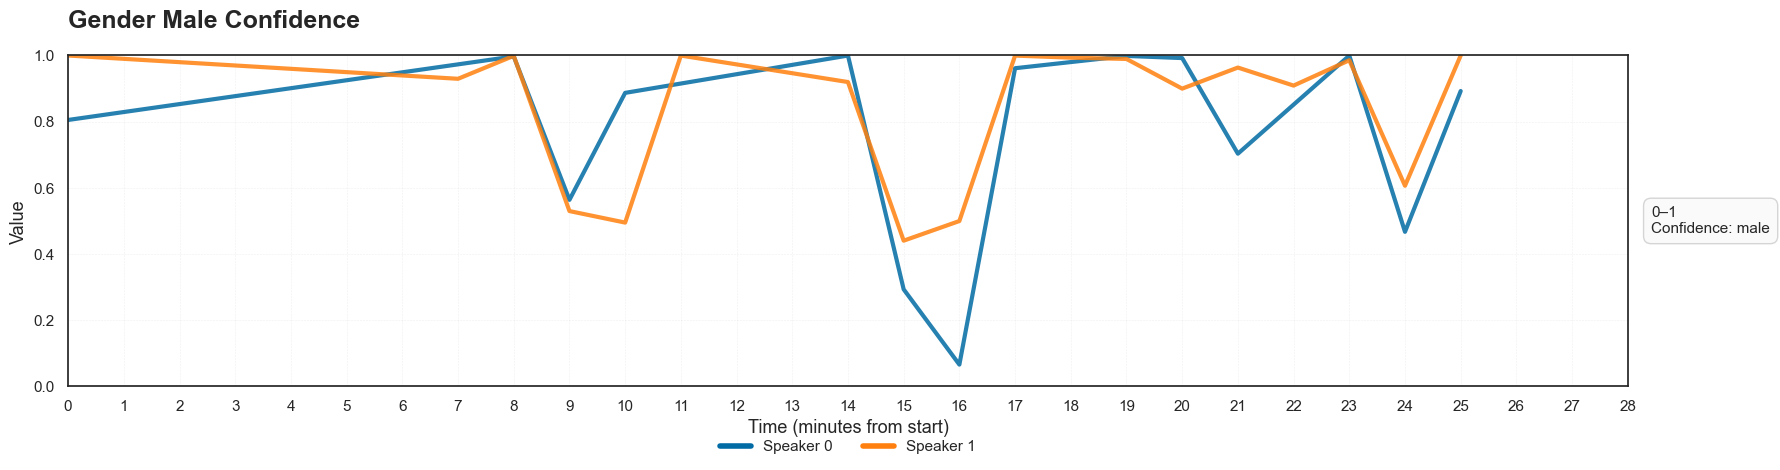

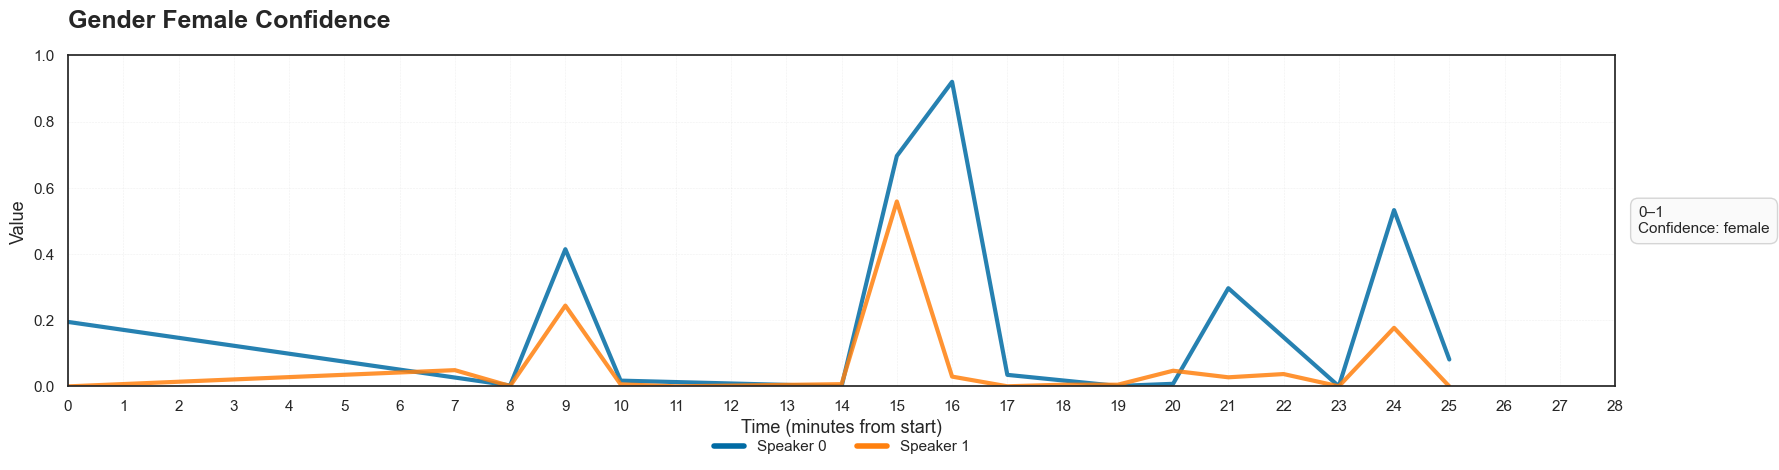

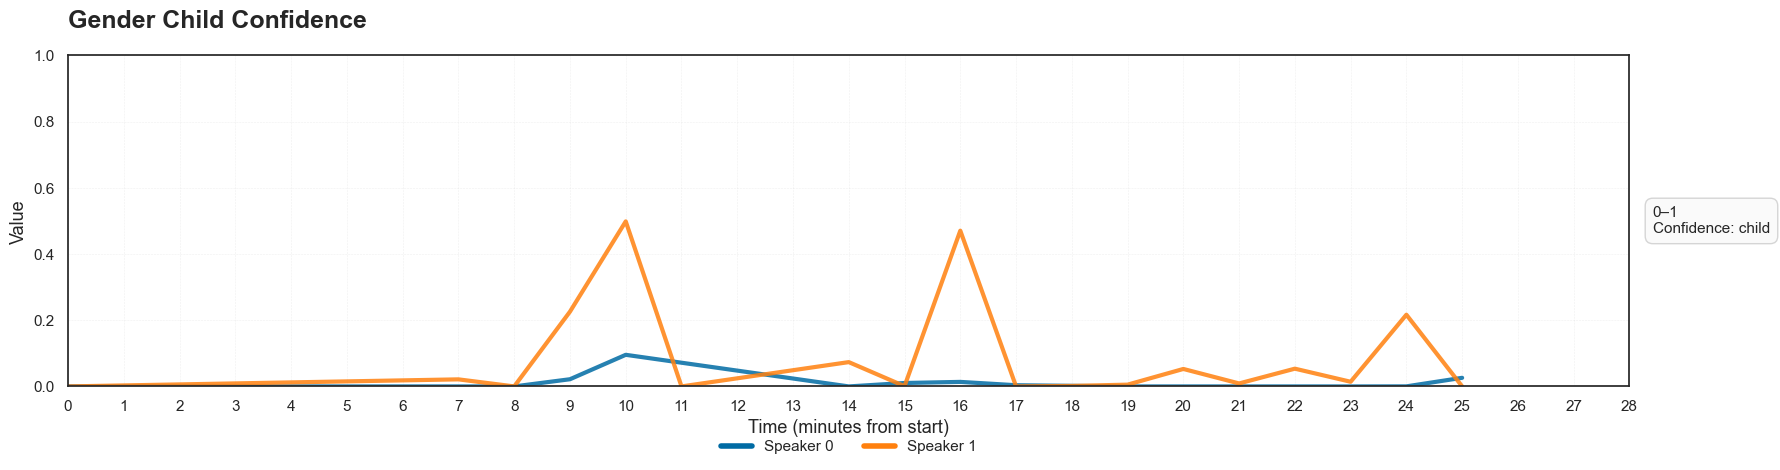

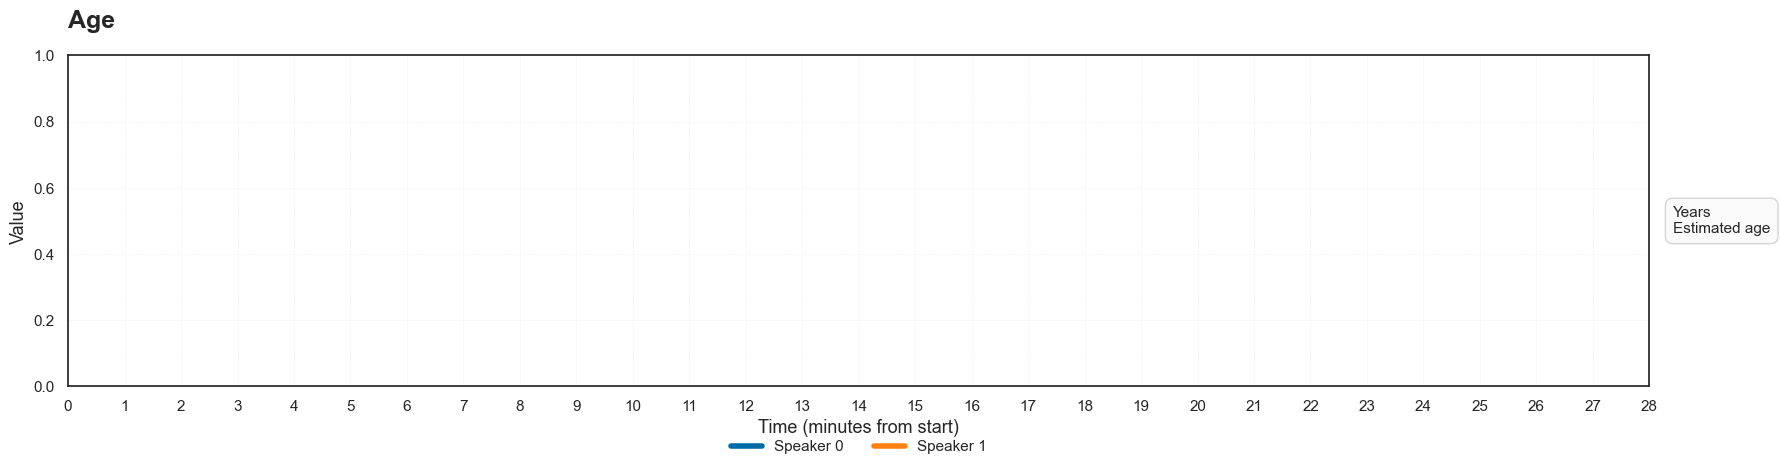

In [ ]:



sns.set_theme(style="white", font="Arial", font_scale=1.2)


df_smooth = df.copy()
df_smooth = df_smooth.sort_values('Time_min')
df_smooth['Time_min_norm'] = df_smooth['Time_min'] - df_smooth['Time_min'].min()


df_smooth['Minute'] = df_smooth['Time_min_norm'].astype(int)
df_by_minute = df_smooth.groupby(['Minute', 'Speaker_Label'])[voice_metrics].mean().reset_index()


speaker_colors = {
    'Speaker 0': '#006BA4',  
    'Speaker 1': '#FF800E',  
}


for metric in voice_metrics:
    fig, ax = plt.subplots(figsize=(18, 5))

    for label in ['Speaker 0', 'Speaker 1']:
        color = speaker_colors[label]
        mask = df_by_minute['Speaker_Label'] == label
        ax.plot(
            df_by_minute.loc[mask, 'Minute'],
            df_by_minute.loc[mask, metric],
            label=label,
            color=color,
            linewidth=3,
            alpha=0.85
        )

    ax.set_title(
        metric.replace('Voice_', '').replace('_', ' ').title(),
        fontsize=18,
        loc='left',
        pad=20,
        fontweight='bold'
    )

    ax.set_xlabel("Time (minutes from start)", fontsize=13)
    ax.set_ylabel("Value", fontsize=13)
    ax.tick_params(axis='both', labelsize=11)
    ax.grid(True, linestyle='--', linewidth=0.4, alpha=0.3)
    ax.set_ylim(0, 1)


    handles = [
        Line2D([0], [0], color=speaker_colors[label], lw=4, label=label)
        for label in ['Speaker 0', 'Speaker 1']
    ]
    ax.legend(
        handles=handles,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.12),
        ncol=2,
        frameon=False,
        fontsize=11
    )


    info_text = metric_info.get(metric, "")
    ax.annotate(
        info_text,
        xy=(1.015, 0.5), xycoords='axes fraction',
        fontsize=11,
        ha='left', va='center',
        bbox=dict(boxstyle='round,pad=0.5', fc='#FAFAFA', ec='lightgray', alpha=0.95)
    )

    plt.subplots_adjust(right=0.87)
    ax.set_xticks(df_by_minute['Minute'].unique())  
    ax.set_xlim(df_by_minute['Minute'].min(), df_by_minute['Minute'].max()) 
    ax.grid(True, axis='x', linestyle='--', linewidth=0.4, alpha=0.3)


    plt.tight_layout()
    plt.show()


In [57]:

counts = df_smooth.groupby(['Minute', 'Speaker_Label']).size().unstack(fill_value=0)

only_silence_minutes = counts[(counts['Speaker 0'] == 0) & (counts['Speaker 1'] == 0)].index


In [58]:
only_silence_minutes

Index([1, 2, 3, 4, 5, 6, 12, 13, 26, 27, 28], dtype='int64', name='Minute')

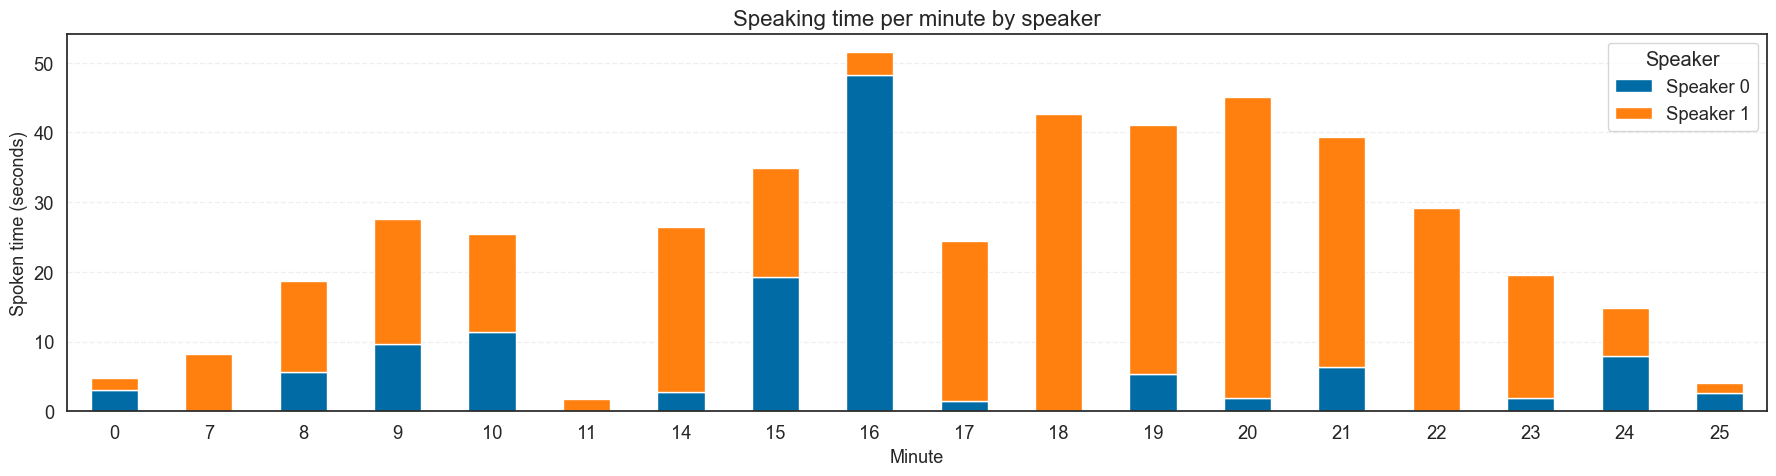

In [ ]:
# CONTRIBUTION RATE 
df['Minute'] = df['Time_min'].astype(int)

df_spoken = df[df['Speaker_Label'] != 'Silence'].copy()


frame_duration = (df['Timestamp'].diff().median()) / 1000  
df_spoken['Duration_sec'] = frame_duration

spoken_per_minute = df_spoken.groupby(['Minute', 'Speaker_Label'])['Duration_sec'].sum().unstack(fill_value=0)


spoken_per_minute.plot(kind='bar', stacked=True, figsize=(18, 5), color={
    'Speaker 0': '#006BA4',
    'Speaker 1': '#FF800E'
})

plt.title("Speaking time per minute by speaker", fontsize=16)
plt.xlabel("Minute", fontsize=13)

plt.ylabel("Spoken time (seconds)", fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=0)
plt.legend(title='Speaker')
plt.tight_layout()
plt.show()


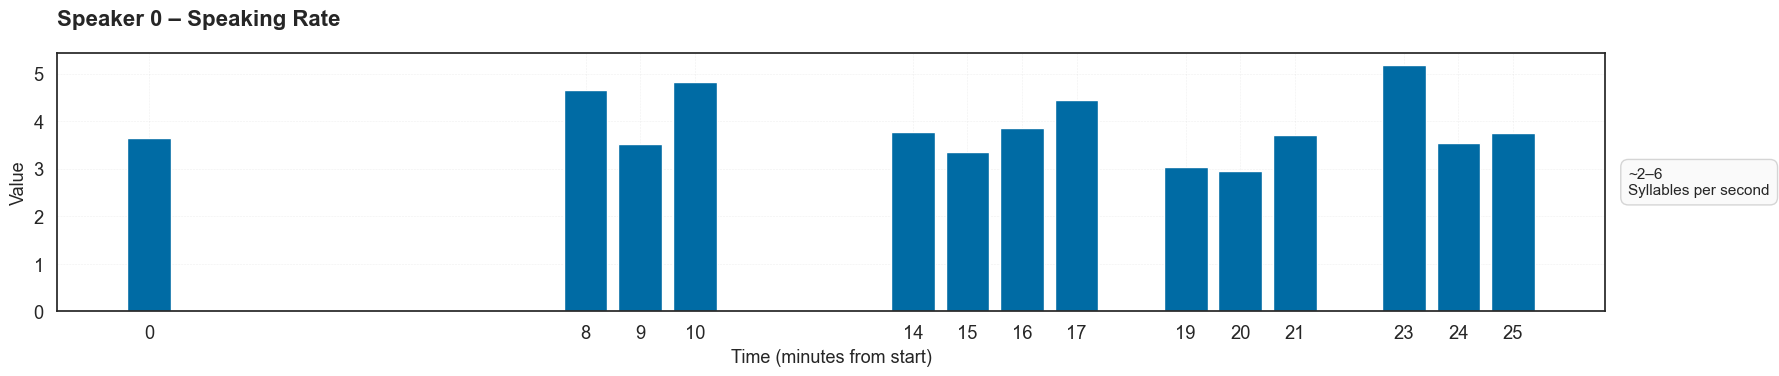

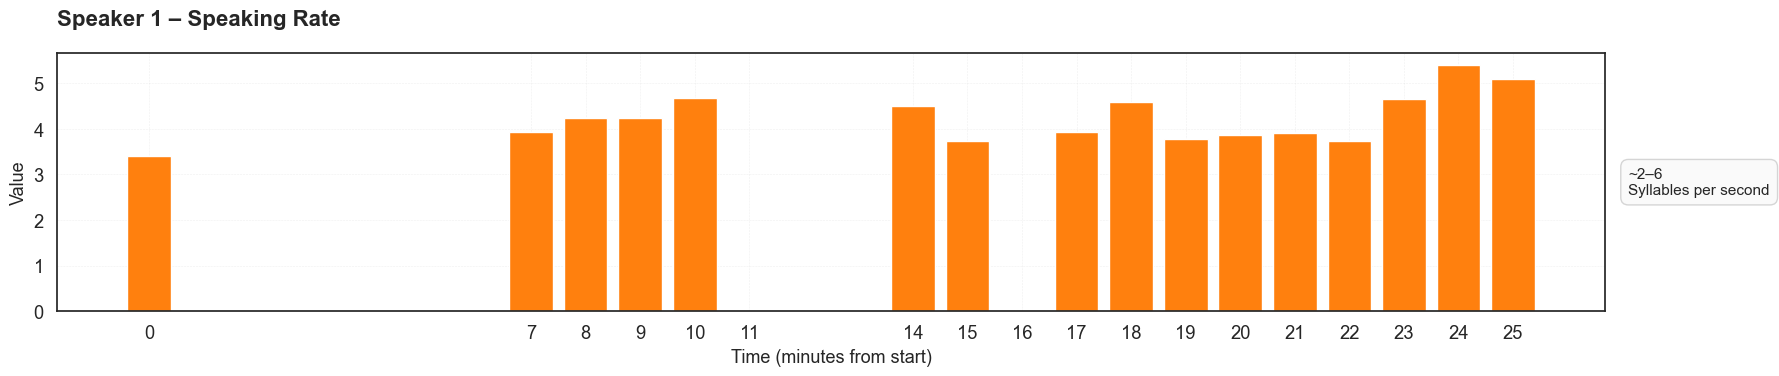

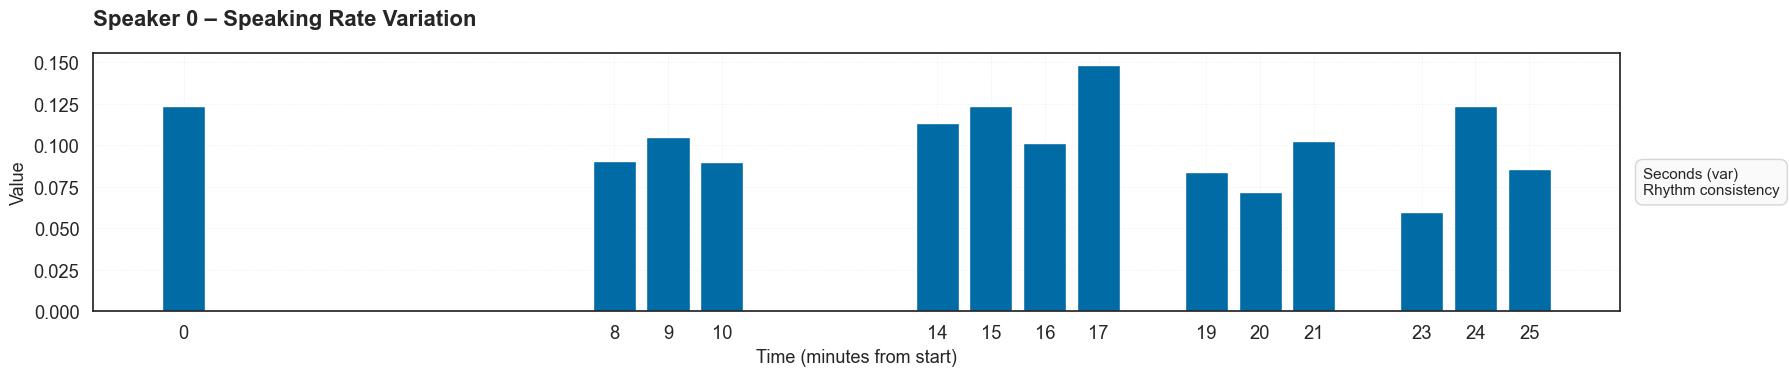

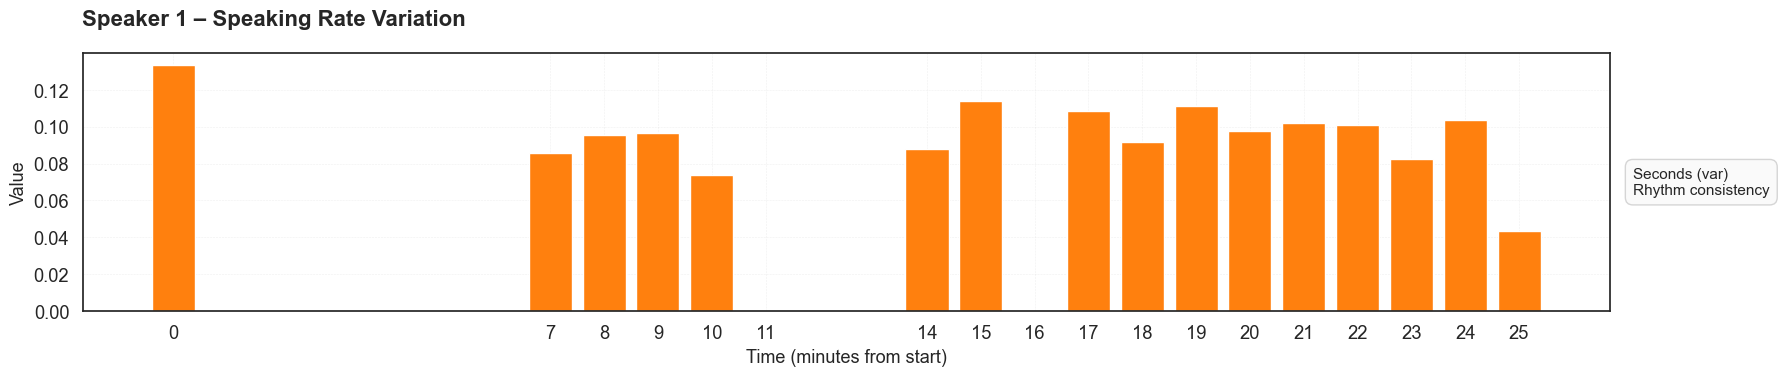

In [63]:
sns.set_theme(style="white", font="Arial", font_scale=1.2)

voice_metrics = ['Voice_Speaking_Rate', 'Voice_Speaking_Rate_Variation']
metric_info = {
    'Voice_Speaking_Rate': "~2–6\nSyllables per second",
    'Voice_Speaking_Rate_Variation': "Seconds (var)\nRhythm consistency"
}
speaker_colors = {
    'Speaker 0': '#006BA4',
    'Speaker 1': '#FF800E',
}

# Filtramos silencios
df_smooth_filtered = df_smooth[df_smooth['Speaker_Label'] != 'Silence'].copy()

# Añadimos la columna de minuto entero
df_smooth_filtered['Minute'] = df_smooth_filtered['Time_min_norm'].astype(int)

# Agrupamos por minuto y speaker
df_by_minute = df_smooth_filtered.groupby(['Minute', 'Speaker_Label'])[voice_metrics].mean().reset_index()

# Para cada métrica y speaker
for metric in voice_metrics:
    for speaker_label in df_by_minute['Speaker_Label'].unique():
        df_speaker = df_by_minute[df_by_minute['Speaker_Label'] == speaker_label]

        fig, ax = plt.subplots(figsize=(18, 4))
        ax.bar(df_speaker['Minute'], df_speaker[metric],
               width=0.8,
               color=speaker_colors.get(speaker_label, '#888'),
               label=speaker_label,
               alpha=1.0)

        ax.set_title(f"{speaker_label} – {metric.replace('Voice_', '').replace('_', ' ').title()}",
                     fontsize=16, loc='left', pad=20, fontweight='bold')

        ax.set_xlabel("Time (minutes from start)", fontsize=13)
        ax.set_ylabel("Value", fontsize=13)

        ax.set_xticks(df_speaker['Minute'])
        ax.grid(True, linestyle='--', linewidth=0.4, alpha=0.3)

        # Info box
        info_text = metric_info.get(metric, "")
        ax.annotate(
            info_text,
            xy=(1.015, 0.5), xycoords='axes fraction',
            fontsize=11,
            ha='left', va='center',
            bbox=dict(boxstyle='round,pad=0.5', fc='#FAFAFA', ec='lightgray', alpha=0.95)
        )

        plt.subplots_adjust(right=0.87)
        plt.tight_layout()
        plt.show()
